In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Задание 7.1
С помощью функции cv2.findContours найти все контуры изображения.

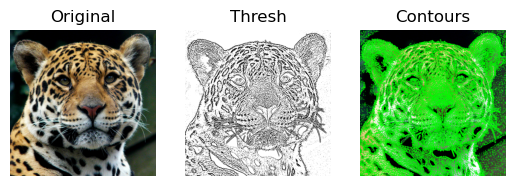

In [2]:
img = cv2.imread('images/jaguar.jpg')
image = cv2.imread('images/jaguar.jpg', 0)
image = cv2.medianBlur(image, 5)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.axis('off')

thresh = cv2.adaptiveThreshold(
    image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)

plt.subplot(132), plt.imshow(thresh, 'gray'), plt.title('Thresh')
plt.axis('off')

contours, hierarchy = cv2.findContours(
    thresh.copy(), 
    cv2.RETR_LIST, 
    cv2.CHAIN_APPROX_SIMPLE
)

for cnt in contours:
    cv2.drawContours(img, cnt, -1, (0, 255, 0), 3)

plt.subplot(133), plt.imshow(img), plt.title('Contours')
plt.axis('off')
plt.show()

# Задание 7.2
Протестировать функцию поиска контура cv2.findContours с аргументом cv2.CHAIN_APPROX_SIMPLE, который экономит память.

In [3]:
img = cv2.imread('images/bmw.jpg')
image = cv2.imread('images/bmw.jpg', 0)
image = cv2.medianBlur(image, 5)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Превратим исходное изображение в бинарное инвертированое 

In [4]:
thresh = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 3, 10
)

Использование аргумента cv2.CHAIN_APPROX_SIMPLE в функции cv2.findContours экономит память

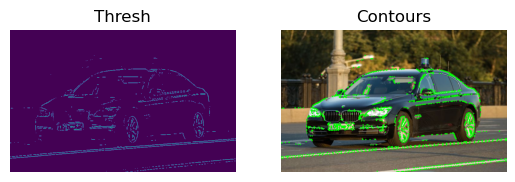

In [5]:
contours, hierarchy = cv2.findContours(
    thresh.copy(),
    cv2.RETR_LIST, 
    cv2.CHAIN_APPROX_SIMPLE
)

for cnt in contours:
    cv2.drawContours(img, cnt, -1, (0, 255, 0), 3)
    
plt.subplot(121), plt.imshow(thresh), plt.title('Thresh')
plt.axis('off')
plt.subplot(122), plt.imshow(img), plt.title('Contours')
plt.axis('off')
plt.show();

# 7.3 Выделить границу методом Канни.

Метод Канни обнаруживает границы связанной области изображения, выполняя поиск локальных максимумов градиента f(x, y). Градиент вычисляется после применения фильтра Гаусса. Метод использует два порога для нахождения сильных и слабых краев. Слабые края включаются в выход, если они связаны с сильными.

In [6]:
img = cv2.imread('images/Titanic.jpg', 0)
edges = cv2.Canny(img, 10, 200, apertureSize = 3)

2 аргумент функции cv2.Canny - минимальный градиент интенсивности;
3 аргумент функции cv2.Canny - максимальный градиент интенсивности

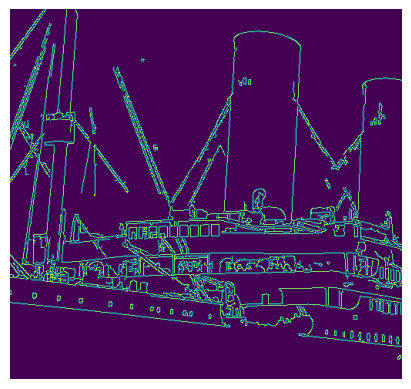

In [7]:
plt.imshow(edges)
plt.axis('off')
plt.show();